# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Suppose we have a business within a neighborhood and we want to expand our business with new branches within the city because it is a good business. What must be done is to look for neighborhoods similar to the one we are in and the neighborhoods that are most similar would be the candidates to open the new business. For the comparison, we need information above:

1. Customer data
2. habits
3. competitors and sociodemographic

For this exercise,suppose that the business of selling agricultural implements is located in the Regent Park neighborhood, where the business is profitable and it is necessary to expand the business in other neighborhoods that have similar characteristics to this neighborhood in order to remain profitable in The new place. So data science help is needed to identify neighborhoods similar to Regent Park

## Data <a name="data"></a>

The data is available en https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv

In [153]:
####Intalación de librerías necesarias
import pandas as pd
import geocoder
import time
import requests
from pandas.io.json import json_normalize
import math
import matplotlib.pyplot as plt
import folium
print('Load Package------------------------------------------------------')

Load Package------------------------------------------------------



We extract the database from the web address mentioned above. We call this base df. This database contains information on the neighborhoods of the city of Toronto.

In [4]:
csv_path='https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv'
df = pd.read_csv(csv_path,encoding='latin1')
print('Data loaded--------------------------------------------------------------------------')

Data loaded--------------------------------------------------------------------------


We proceed to locate the necessary information needed for the model. In this case, due to the extensive information available, we select only the following information:
* Population density per square kilometer
* Population, 2016
* Total income: Population with an amount
* Natural resources, agriculture and related production occupations
* Agriculture, forestry, fishing and hunting


In [5]:
DensityPob =df[df["Characteristic"]=="Population density per square kilometre"]
Population =df[df["Characteristic"]=="Population, 2016"]
Income =df[df["Characteristic"]=="Total income: Population with an amount"]
OcupacionIndustri =df[df["Characteristic"]=="    8 Natural resources, agriculture and related production occupations"]
Industry =df[df["Characteristic"]=="    11 Agriculture, forestry, fishing and hunting"]
Data = pd.concat([DensityPob,Population,Income,OcupacionIndustri,Industry],axis=0)
Data1 = Data.iloc[:,5:].T
Data1.columns=["Density","Population","Income","OcupacionIndustri","Industry"]
Data1

,Density,Population,Income,OcupacionIndustri,Industry
Agincourt North,"3,929","29,113","23,505",50,40
Agincourt South-Malvern West,"3,034","23,757","19,370",35,40
Alderwood,"2,435","12,054","9,915",60,10
Annex,"10,863","30,526","25,615",60,10
Banbury-Don Mills,"2,775","27,695","22,335",60,10
...,...,...,...,...,...
Wychwood,"8,541","14,349","11,030",75,10
Yonge-Eglinton,"7,162","11,817","9,555",30,15
Yonge-St.Clair,"10,708","12,528","10,805",30,20
York University Heights,"2,086","27,593","22,230",75,10


In [18]:
print("OBJECT TYPE")
for i in Data1.columns:
    a = Data1[i].dtype
    print(i + "-->"+str(a))

OBJECT TYPE
Density-->object
Population-->object
Income-->object
OcupacionIndustri-->object
Industry-->object



As we can see the type of data is an object, and therefore it is a string, when we know that the data must be numerical. For this reason we must convert the data to float type. We do this as follows:

In [19]:
Data1["Density"] = Data1["Density"].str.replace(',','.').astype(float)
Data1["Population"] = Data1["Population"].str.replace(',','.').astype(float)
Data1["Income"] = Data1["Income"].str.replace(',','.').astype(float)
Data1["OcupacionIndustri"] = Data1["OcupacionIndustri"].str.replace(',','.').astype(float)
Data1["Industry"] = Data1["Industry"].str.replace(',','.').astype(float)

We now have the information available so that it can be modeled in a correct way.

In [20]:
Data1

,Density,Population,Income,OcupacionIndustri,Industry
Agincourt North,3.929,29.113,23.505,50.0,40.0
Agincourt South-Malvern West,3.034,23.757,19.370,35.0,40.0
Alderwood,2.435,12.054,9.915,60.0,10.0
Annex,10.863,30.526,25.615,60.0,10.0
Banbury-Don Mills,2.775,27.695,22.335,60.0,10.0
...,...,...,...,...,...
Wychwood,8.541,14.349,11.030,75.0,10.0
Yonge-Eglinton,7.162,11.817,9.555,30.0,15.0
Yonge-St.Clair,10.708,12.528,10.805,30.0,20.0
York University Heights,2.086,27.593,22.230,75.0,10.0



Now, we need the geographic location information of the points, that is, the longitude and latitude of each neighborhood.
For this we use the following line of code

In [23]:
lat=[]
lon=[]
for i in Data1.index:
    i = i+','+'Canada'
    loc = geocoder.osm(i)
    try:
        lat.append(loc.latlng[0])
        lon.append(loc.latlng[1])
        print(i+'-----------'+" address found ")
    except:
        lat.append('')
        lon.append('')
        print(i+'-----------'+" address not found ")
print("Process succesful*****")


Agincourt North,Canada----------- address found 
Agincourt South-Malvern West,Canada----------- address found 
Alderwood,Canada----------- address found 
Annex,Canada----------- address found 
Banbury-Don Mills,Canada----------- address found 
Bathurst Manor,Canada----------- address found 
Bay Street Corridor,Canada----------- address found 
Bayview Village,Canada----------- address found 
Bayview Woods-Steeles,Canada----------- address found 
Bedford Park-Nortown,Canada----------- address not found 
Beechborough-Greenbrook,Canada----------- address not found 
Bendale,Canada----------- address found 
Birchcliffe-Cliffside,Canada----------- address not found 
Black Creek,Canada----------- address found 
Blake-Jones,Canada----------- address not found 
Briar Hill-Belgravia,Canada----------- address not found 
Bridle Path-Sunnybrook-York Mills,Canada----------- address not found 
Broadview North,Canada----------- address found 
Brookhaven-Amesbury,Canada----------- address not found 
Cab


The process ends successfully and we proceed to join this information to the database that we initially created. In addition we could see that there are data which were not found. Because of this, only neighborhoods that dip data from both latitude and longitude are filtered.

In [28]:
len(lon)

140

In [30]:
Data1['Latitude']=lat
Data1['Longitude']=lon
Data1= Data1[Data1['Latitude']!='']
Data1

,Density,Population,Income,OcupacionIndustri,Industry,Latitude,Longitude
Agincourt North,3.929,29.113,23.505,50.0,40.0,43.808,-79.2664
Agincourt South-Malvern West,3.034,23.757,19.370,35.0,40.0,43.7985,-79.2622
Alderwood,2.435,12.054,9.915,60.0,10.0,43.6017,-79.5452
Annex,10.863,30.526,25.615,60.0,10.0,43.6703,-79.4071
Banbury-Don Mills,2.775,27.695,22.335,60.0,10.0,43.7348,-79.3572
...,...,...,...,...,...,...,...
Wychwood,8.541,14.349,11.030,75.0,10.0,43.6821,-79.4239
Yonge-Eglinton,7.162,11.817,9.555,30.0,15.0,43.7067,-79.3983
Yonge-St.Clair,10.708,12.528,10.805,30.0,20.0,43.6882,-79.394
York University Heights,2.086,27.593,22.230,75.0,10.0,43.7588,-79.5194


### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.


We are interested in places in the category of 'agricultural products'. For that we use fourdquare data and proceed to look for these businesses within the city of Toronto:

In [127]:
loc = geocoder.osm('Toronto')
latitude=loc.latlng[0]
longitude=loc.latlng[1]
CLIENT_ID = 'LVHJ1YEXKGCGLJUK3DZHNZ0QIGVDDGR3QVXPXMYFEI5IDNOG' # your Foursquare ID
CLIENT_SECRET = 'J20NWCR43D3CUFJMBUUJCOF30NYRF5AKKC2Q224UYHBNIPRD' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
search_query = 'farm products'
radius = 10000000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude,longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe = dataframe[dataframe["location.city"]=="Toronto"]
dataframe

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.postalCode,location.crossStreet,venuePage.id
0,4c1be607eac020a17ca245c2,Alex Farm Products,[],v-1576615362,False,43.669960,-79.388584,"[{'label': 'display', 'lat': 43.66996022207461...",1784,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,NaN,NaN,NaN
1,4bb266aca32876b0598c00fe,Alex Farm Products,"[{'id': '4bf58dd8d48988d11e951735', 'name': 'C...",v-1576615362,False,43.677571,-79.352016,"[{'label': 'display', 'lat': 43.67757080746007...",3864,CA,Toronto,ON,Canada,"[379 Danforth Ave., Toronto ON M4K, Canada]",379 Danforth Ave.,M4K,NaN,NaN
2,4e1de75f3151645030258772,Alex Farm Products,"[{'id': '4bf58dd8d48988d11e951735', 'name': 'C...",v-1576615362,False,43.704801,-79.374933,"[{'label': 'display', 'lat': 43.70480141815145...",5744,CA,Toronto,ON,Canada,"[1537 Bayview Ave (Belsize), Toronto ON, Canada]",1537 Bayview Ave,NaN,Belsize,NaN
3,4de11944d164e323c7bc79fc,Alex Farm Products (Beaches),"[{'id': '4bf58dd8d48988d11e951735', 'name': 'C...",v-1576615362,False,43.669688,-79.301663,"[{'label': 'display', 'lat': 43.66968773847534...",7107,CA,Toronto,ON,Canada,"[1965 Queen St East, Toronto ON, Canada]",1965 Queen St East,NaN,NaN,NaN
5,4c1e88af2c8fef3b8f9fe3bb,Master Soft & Delight Dairy Products Inc.,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",v-1576615362,False,43.652026,-79.382316,"[{'label': 'display', 'lat': 43.65202641526233...",449,CA,Toronto,ON,Canada,"[Bay Street (Bay & Queens Quay W), Toronto ON ...",Bay Street,M5H,Bay & Queens Quay W,NaN
6,4d793f2b71a68cfa70811386,Disney Consumer Products,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1576615362,False,43.645228,-79.384664,"[{'label': 'display', 'lat': 43.64522769242353...",993,CA,Toronto,ON,Canada,"[200 Front Street West, Toronto ON, Canada]",200 Front Street West,NaN,NaN,NaN
7,4beeb0d63686c9b67bc9246e,Alex Farm Cheese,"[{'id': '4bf58dd8d48988d11e951735', 'name': 'C...",v-1576615362,False,43.648534,-79.371520,"[{'label': 'display', 'lat': 43.64853370176147...",1400,CA,Toronto,ON,Canada,"[93 Front St E (Jarvis St), Toronto ON M5C 1C3...",93 Front St E,M5C 1C3,Jarvis St,NaN
8,4f3933c2e4b0d408a64593fc,State Farm Insurance Tracey Pether,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1576615362,False,43.651448,-79.371731,"[{'label': 'display', 'lat': 43.65144832090807...",1277,CA,Toronto,ON,Canada,"[207 Adelaide St E. (Jarvis St.), Toronto ON, ...",207 Adelaide St E.,NaN,Jarvis St.,NaN
9,4ad7f103f964a5203a1021e3,Harbour Green Farms,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1576615362,False,43.635700,-79.398545,"[{'label': 'display', 'lat': 43.63569983023805...",2228,CA,Toronto,ON,Canada,"[650 Queens Quay West, Toronto ON, Canada]",650 Queens Quay West,NaN,NaN,NaN
10,54f50d6e498ed21d0b69ce04,Canada Promotional Products,"[{'id': '5453de49498eade8af355881', 'name': 'B...",v-1576615362,False,43.660436,-79.362102,"[{'label': 'display', 'lat': 43.66043634999892...",2146,CA,Toronto,ON,Canada,[585 Dundas Street East (Dundas and Parliament...,585 Dundas Street East,M5A 2B7,Dundas and Parliament,NaN


## Methodology <a name="methodology"></a>

Si los negocios que se ubicaron con el API fourquare estan a un radio menor de 0.1km , entonces contará como  un negocio que se encuentra dentro del vecindario. Para esto debemos encontrar la distancia entre los puntos.

In [139]:
def distancia(lat1,long1,lat2,long2):
    return (math.sqrt((lat1-lat2)*(lat1-lat2)+(long1-long2)*(long1-long2)))
A=Data1[["Latitude","Longitude"]]
B =dataframe[["location.lat","location.lng"]]
b=list()
d=[]
for i in list(range(A.shape[0])):
    count = 0
    for j in list(range(B.shape[0])):
        a=distancia(A.iloc[i,0],A.iloc[i,1],B.iloc[j,0],B.iloc[j,1])
        if a<0.1:
            count=count+1
        else:
            count=count
        b.append(count)
        c=sum(b)
        b=[]
    d.append(c)

        

In [142]:
Data1["Num_Anothers_business"]=d

C:\Users\wguallasamin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
Data1

,Density,Population,Income,OcupacionIndustri,Industry,Latitude,Longitude,Num_Anothers_business
Agincourt North,3.929,29.113,23.505,50.0,40.0,43.808,-79.2664,2
Agincourt South-Malvern West,3.034,23.757,19.370,35.0,40.0,43.7985,-79.2622,2
Alderwood,2.435,12.054,9.915,60.0,10.0,43.6017,-79.5452,1
Annex,10.863,30.526,25.615,60.0,10.0,43.6703,-79.4071,10
Banbury-Don Mills,2.775,27.695,22.335,60.0,10.0,43.7348,-79.3572,11
...,...,...,...,...,...,...,...,...
Wychwood,8.541,14.349,11.030,75.0,10.0,43.6821,-79.4239,11
Yonge-Eglinton,7.162,11.817,9.555,30.0,15.0,43.7067,-79.3983,10
Yonge-St.Clair,10.708,12.528,10.805,30.0,20.0,43.6882,-79.394,11
York University Heights,2.086,27.593,22.230,75.0,10.0,43.7588,-79.5194,2



For the variables Density Population Income Occupation Industry Industry will be processed as continuous variables and then we will show a descriptive analysis of these variables

In [148]:
Data1[["Density","Population","Income","OcupacionIndustri","Industry"]].describe(include="all")

,Density,Population,Income,OcupacionIndustri,Industry
count,107.000000,107.000000,107.000000,107.000000,107.000000
mean,6.574570,19.099271,15.249159,50.186916,15.186916
std,5.325287,8.967038,7.189441,27.082380,12.718380
min,1.260000,7.607000,5.985000,0.000000,0.000000
25%,3.605000,12.455000,10.112500,30.000000,10.000000
50%,5.395000,16.724000,13.230000,50.000000,10.000000
75%,7.461000,23.794000,19.102500,65.000000,20.000000
max,44.321000,53.485000,41.570000,135.000000,60.000000


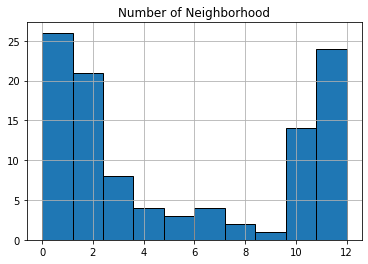

<Figure size 432x288 with 0 Axes>

In [152]:
plt.title('Number of Neighborhood')
plt.hist(Data1["Num_Anothers_business"], bins=10, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

In [169]:
Data2 =Data1.reset_index()
mapa=folium.Map(location=[latitude,longitude])

In [183]:
for i in list(range(Data2.shape[0])):
    folium.Marker([Data2.iloc[i,6], Data2.iloc[i,7]], popup=Data2.iloc[i,0]).add_to(mapa)
    
for i in list(range(dataframe.shape[0])):
    folium.Marker([dataframe.iloc[i,5], dataframe.iloc[i,6]], popup=dataframe.iloc[i,1],icon=folium.Icon(color='green')).add_to(mapa)

En el mapa siguiente podemos visualizar los vecindarios de la ciudad de Torontos y los negocios relacionados con productos agrícolas

In [184]:
mapa

In [188]:
Data2.rename(columns={"index":"Neighborh"},inplace=True)


We will use percentages for the data because they better represent demographic aspects. We will do it as follows:

In [193]:
Data3=pd.DataFrame(columns=["Density","Per_Income","Per_Industry","Per_OcupacionIndustry","Num_Anothers_business"])
Data3["Density"]=Data2["Density"]
Data3["Per_Income"]=Data2["Income"]/Data2["Population"]
Data3["Per_Industry"]=Data2["Industry"]/Data2["Population"]
Data3["Per_OcupacionIndustry"]=Data2["OcupacionIndustri"]/Data2["Population"]
Data3["Num_Anothers_business"]=Data2["Num_Anothers_business"]

In [194]:
Data3

,Density,Per_Income,Per_Industry,Per_OcupacionIndustry,Num_Anothers_business
0,3.929,0.807371,1.373957,1.717446,2
1,3.034,0.815339,1.683714,1.473250,2
2,2.435,0.822549,0.829600,4.977601,1
3,10.863,0.839121,0.327590,1.965538,10
4,2.775,0.806463,0.361076,2.166456,11
...,...,...,...,...,...
102,8.541,0.768695,0.696913,5.226845,11
103,7.162,0.808581,1.269358,2.538715,10
104,10.708,0.862468,1.596424,2.394636,11
105,2.086,0.805639,0.362411,2.718081,2


Una vez que hemos estandarizamos la base de datos procedemos a realizar los analisis respectivos para una segmentación.

## Analysis <a name="analysis"></a>


Once we have the database we proceed to make similar groups and see in group the initially selected neighborhood falls. We will do this with the K means algorithm. Once we form the groups and when we know the group that is in our neighborhood, the neighborhoods that are within that group are potential places where we can locate our new business

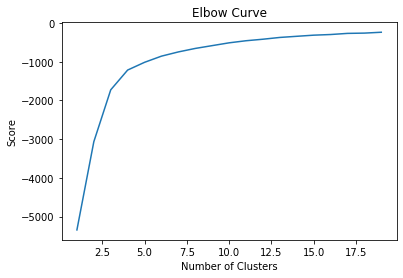

In [208]:
from sklearn.cluster import KMeans

number_of_clusters = 1

X = Data3.values

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()



The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.


In this case it is indicating that the optimal number of groups is 4, since at this point the curve dramatically changes its direction

In [213]:
kmeans = KMeans(n_clusters=4)
group =kmeans.fit(X).predict(X)

In [218]:
Data2["Group"] =group

In [219]:
Data2

,Neighborh,Density,Population,Income,OcupacionIndustri,Industry,Latitude,Longitude,Num_Anothers_business,Group
0,Agincourt North,3.929,29.113,23.505,50.0,40.0,43.808,-79.2664,2,2
1,Agincourt South-Malvern West,3.034,23.757,19.370,35.0,40.0,43.7985,-79.2622,2,2
2,Alderwood,2.435,12.054,9.915,60.0,10.0,43.6017,-79.5452,1,2
3,Annex,10.863,30.526,25.615,60.0,10.0,43.6703,-79.4071,10,1
4,Banbury-Don Mills,2.775,27.695,22.335,60.0,10.0,43.7348,-79.3572,11,1
...,...,...,...,...,...,...,...,...,...,...
102,Wychwood,8.541,14.349,11.030,75.0,10.0,43.6821,-79.4239,11,1
103,Yonge-Eglinton,7.162,11.817,9.555,30.0,15.0,43.7067,-79.3983,10,1
104,Yonge-St.Clair,10.708,12.528,10.805,30.0,20.0,43.6882,-79.394,11,1
105,York University Heights,2.086,27.593,22.230,75.0,10.0,43.7588,-79.5194,2,2


## Results and Discussion <a name="results"></a>


The Neighborh according to the classification of the algorithm is in group 2, for that reason we select all of the group2

In [226]:
Data4=Data2[Data2["Group"]==0]

In [227]:
Data4

,Neighborh,Density,Population,Income,OcupacionIndustri,Industry,Latitude,Longitude,Num_Anothers_business,Group
6,Bay Street Corridor,14.097,25.797,22.835,15.0,0.0,43.665,-79.3874,11,0
15,Church-Yonge Corridor,23.044,31.340,28.370,25.0,10.0,43.6799,-79.3887,11,0
53,Little Portugal,12.859,15.559,13.375,25.0,25.0,43.6474,-79.4311,11,0
60,Moss Park,14.753,20.506,16.615,40.0,20.0,43.6546,-79.3697,11,0
63,Mount Pleasant West,21.969,29.658,25.590,70.0,20.0,49.1201,-101.818,0,0
77,Regent Park,16.880,10.803,8.505,45.0,0.0,43.6607,-79.3605,11,0
90,Taylor-Massey,15.528,15.683,11.780,35.0,10.0,43.724,-79.2662,3,0


We can see that there are 6 similar neighborhoods that share similar characteristics with our business located in Regent Park. In any of these neighborhoods the business will probably be very profitable. However, if we analyze other data in detail, we can realize that only in one of them there is no place located in that neighborhood. This neighborhood is Mount Pleasant West. So the ideal place for the new business will be this neighborhood.

In [228]:
distancia(Data4.iloc[5,6],Data4.iloc[5,7],Data4.iloc[6,6],Data4.iloc[6,7])

0.11356284301817904

La distancia por la cual estan separadas estos dos negocios será de 11km lo cual le da un amplio margen para la búsqueda de nuevos clientes.

## Conclusion <a name="conclusion"></a>


It is proposed that the new business be opened in Regent Park because it shares similar characteristics to that of the business that we have that is profitable. In addition to this, there are no other similar businesses near this area.